# The Perceptron
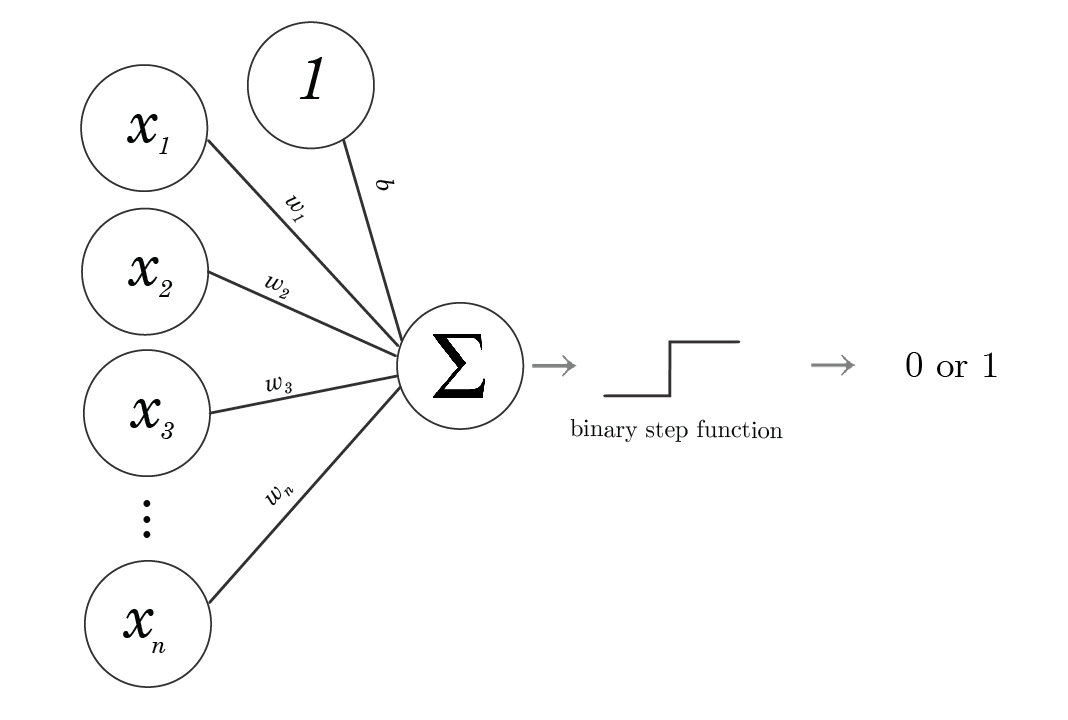

# Overview
The perceptron is a type of machine learning algorithm used for binary classification tasks. It is a type of neural network that consists of a single node.

The perceptron algorithm works by taking in a set of input features and calculating a weighted sum of those features. The weighted sum is then passed through an activation function to produce a binary output, usually -1 or 1. The algorithm adjusts the weights assigned to each feature based on the error in its prediction and continues this process until all iterations have passed.
# Advantages
1. Simple to implement and very fast to process. 

# Disadvantages
1. Can only be used for linearly separable problems and is not suitable for more complex tasks. 
2. If the data is not linearly separable or if the learning rate is set too high, then may lead to poor accuracy.

# Data
The Wisconsin Breast Cancer Dataset is a collection of medical data on breast cancer patients, at the University of Wisconsin Hospitals. The dataset contains information on 569 breast cancer patients and includes measurements of 30 different features of their cancer cells, such as radius, texture, and concavity.

The dataset is commonly used as a benchmark for machine learning algorithms for classification tasks, particularly in binary classification of malignant and benign tumors. The goal of the classification task is to predict whether a given tumor is malignant or benign based on the measurements of its features.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn import metrics

In this analysis, we will explore the relationship between two key features of breast cancer cells, the radius mean and concave mean, and how these features can be used to differentiate between cancer cells that are either benign or malignant. By visualizing the relationship between these features, we can gain a deeper understanding of how they may be useful in predicting the presence of cancer, which may inform future diagnostic and treatment approaches.

[Text(0.5, 1.0, 'Visualization of data'),
 Text(0.5, 0, 'Radius mean'),
 Text(0, 0.5, 'Concave points mean')]

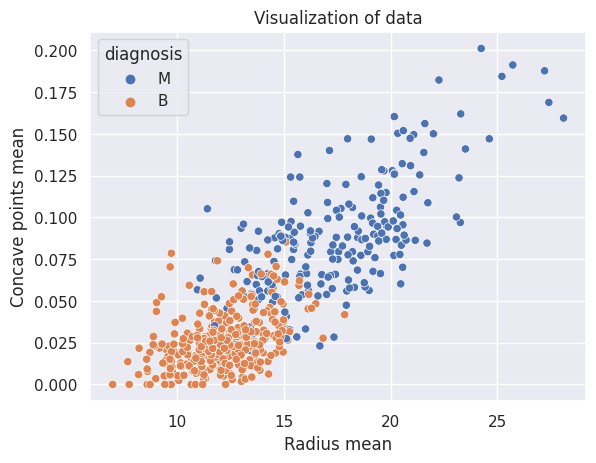

In [2]:
sns.set_theme() 
df = pd.read_csv("WiscosinBreastCancerDiagnostic.csv")

# Store the diagnosis result, either Malignant or Benign and convert them to nuemric
y = df.diagnosis.values
y = np.where(y == 'B', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["radius_mean", "concave points_mean"]].values

sns.scatterplot(data=df, x="radius_mean", y="concave points_mean", hue="diagnosis").set(title='Visualization of data', 
                                        xlabel='Radius mean', 
                                        ylabel='Concave points mean')
                



We made a Python class for the perceptron algorithm that stores scaling, epochs, weights, and training errors. It includes training, input, and predict methods for classification. 

In [3]:
class Perceptron:
    
    # Initialize class
    def __init__(self, learning_rate = .5, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def initWeightBias(self, X, y):
        n_features = X.shape[1]
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()
    
    def activation_func(self, output):
        output = np.where(output >= 0.0, 1, -1)
        return output
        
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        pred_output = self.activation_func(output)
        return pred_output
        
    def train(self, X, y):
        self.initWeightBias(X, y)
        self.errors_ = []
        for epo in range(self.epochs):
            errors = 0
            for x_i, y_i in zip(X, y):
                pred_output = self.predict(x_i)
                update = self.learning_rate * (pred_output - y_i)
                # Gradient descent for perceptron
                self.weights = self.weights - update * x_i
                self.bias = self.bias - update
                # If prediction not match outcome yi
                if update != 0:
                    errors = errors + abs(int(update))
            if errors != 0:
                self.errors_.append(errors)
                


We create an instance of the Perceptron class and  train this instance.

In [4]:
perceptron = Perceptron()
perceptron.train(X, y)
y_pred = perceptron.predict(X)

We check how many of the predictions are true.

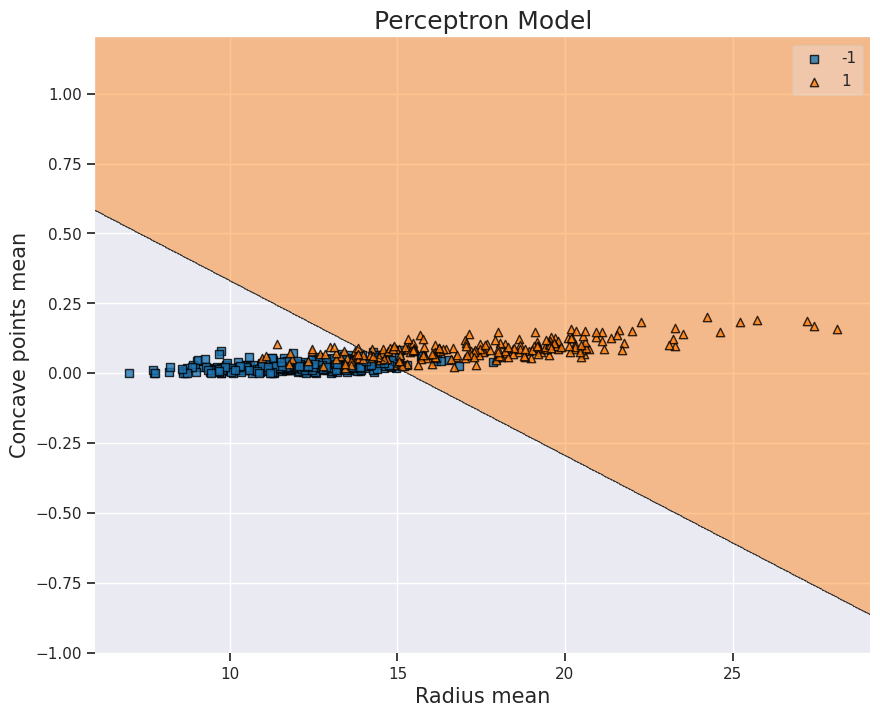

In [5]:
def accuracy(y_pred, y):
    count = 0
    for y_pred_i, y_i in zip(y_pred, y):
        if y_pred_i == y_i:
            count = count + 1
    print(count*100/len(y_pred))
        
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron)
plt.title("Perceptron Model", fontsize = 18)
plt.xlabel("Radius mean", fontsize = 15)
plt.ylabel("Concave points mean", fontsize = 15)
plt.show()

There is separation line between the malign and benign cancer cells, although it is not a clear separation. Now we visualize how the errors of our percetron changes over many epoches.

[Text(0.5, 1.0, 'Erros over iterations'),
 Text(0.5, 0, 'Number of iterations'),
 Text(0, 0.5, 'Number of errors')]

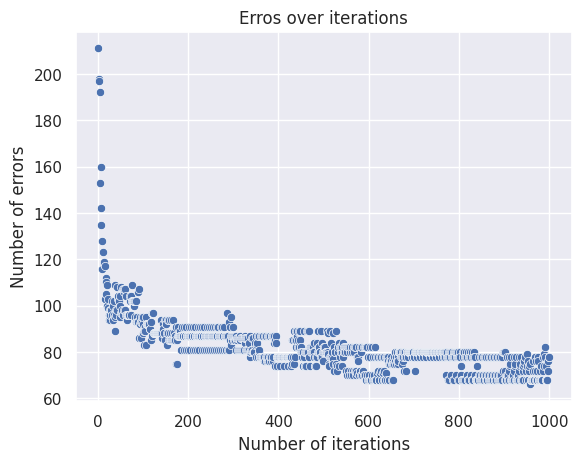

In [6]:
x_axis = range(1, len(perceptron.errors_)+1)
y_axis = perceptron.errors_
sns.scatterplot(x=x_axis, y=y_axis).set(title='Erros over iterations', 
                                        xlabel='Number of iterations', 
                                        ylabel='Number of errors')

The errors decrease dramatically over many epoches,especially after the first 200 epoches, and stablize at around 800 epoches. Now we try to split our data into training and test sets to see if our percetron is still accurate.

69.00584795321637


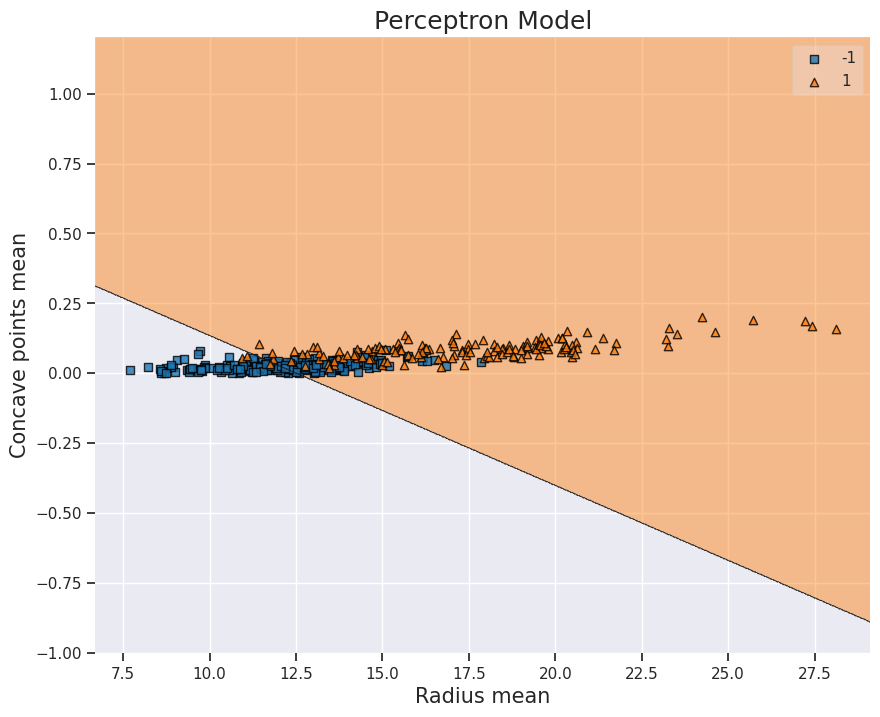

In [7]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)
perceptron.train(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy(y_pred, y_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X_train, y_train, clf = perceptron)
plt.title("Perceptron Model", fontsize = 18)
plt.xlabel("Radius mean", fontsize = 15)
plt.ylabel("Concave points mean", fontsize = 15)
plt.show()

[Text(0.5, 1.0, 'Errors over iterations'),
 Text(0.5, 0, 'Number of iterations'),
 Text(0, 0.5, 'Number of errors')]

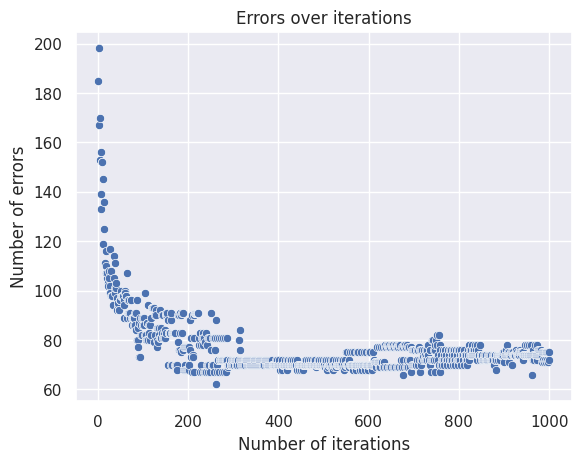

In [8]:
x_axis = range(1, len(perceptron.errors_)+1)
y_axis = perceptron.errors_
sns.scatterplot(x=x_axis, y=y_axis).set(title='Errors over iterations', 
                                        xlabel='Number of iterations', 
                                        ylabel='Number of errors')

Our model peforms similary when there is no splitting of test set. We can also create a confusion matrix to visualize the performance of our perceptron. A confusion matrix is a table that summarizes the performance of a machine learning classification algorithm by comparing the predicted labels to the actual labels of a set of test data. The matrix contains four elements: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

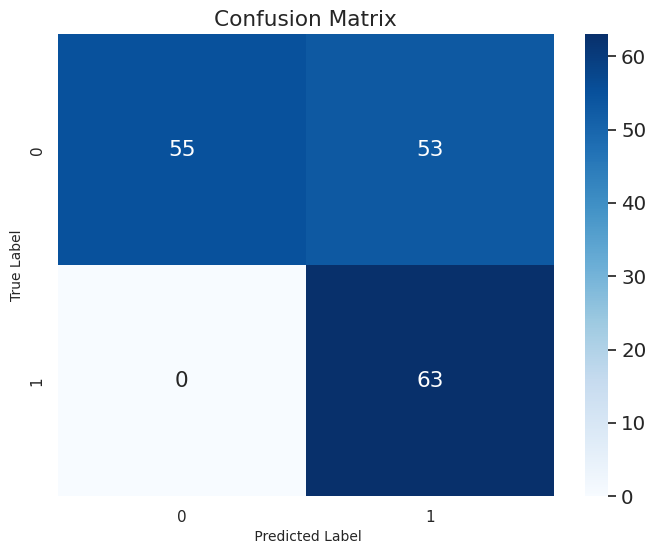

In [9]:
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)
matrix_ppn = pd.DataFrame (confusion_matrix)
plt.figure (figsize =(8,6))
ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_ppn, 
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap=plt.cm.Blues)
ax.set_title ('Confusion Matrix')
ax.set_xlabel (' Predicted Label', fontsize =10)
ax.set_ylabel ('True Label', fontsize =10)
plt.show ()

# Conclusion
Our perceptron model has zero false negatives but many false positives, indicating that the model is highly sensitive but not very specific. This actually is highly very desirable in our case of cancer diagnosis, because we rather have a model that flags many healthy patients as having cancer, than skipping actual patients with cancer. This ensures that no actual cases of cancers are missed, but the low specificity may lead to unnecessary tests non-canncer patients.